In [1]:
import glob
from os.path import join, splitext, basename
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import trading as trd

In [3]:
# relaod module after modifying it
import importlib
importlib.reload(trd)

<module 'trading' from 'C:\\Users\\hamza\\Documents\\school\\cs_229\\cs229_final_project\\src\\trading\\__init__.py'>

In [4]:
STOCK_DATA_LOC = join('..', 'data')
stock_files = glob.glob(join(STOCK_DATA_LOC, '*.csv'))
p = np.random.permutation(range(0,len(stock_files)))

In [14]:
stock_files = ['..\\data\\tsla.csv', '..\\data\\tasr.csv']
p = [0, 1]

In [15]:
stock_a_name = splitext(basename(stock_files[p[0]]))[0]
stock_a = trd.read_stock_history(stock_files[p[0]])
stock_b_name = splitext(basename(stock_files[p[1]]))[0]
stock_b = trd.read_stock_history(stock_files[p[1]])

In [16]:
rebal = trd.rebalance_benchmark(stock_a, stock_b)

In [17]:
do_nothing = trd.do_nothing_benchmark(stock_a, stock_b)

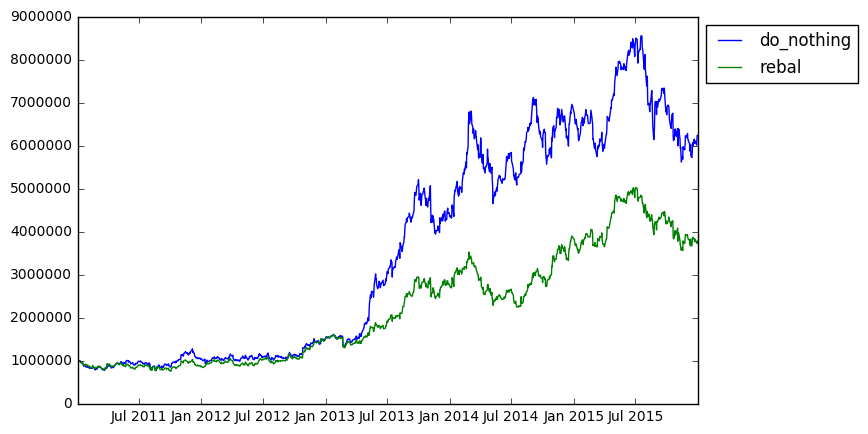

In [18]:
f = plt.figure(figsize=(8, 5))
ax = f.gca()

#ax.plot_date(stock_a.index, stock_a, ls='solid', marker='', label=stock_a_name)
#ax.plot_date(stock_b.index, stock_b, ls='solid', marker='', label=stock_b_name)
ax.plot_date(do_nothing.index, do_nothing['total'], ls='solid', marker='', label='do_nothing')
ax.plot_date(rebal.index, rebal['total'], ls='solid', marker='', label='rebal')

ax.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)